In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'../data/marketingcampaigns_limpio.csv')

In [3]:
df.head(2)

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
0,Public-key multi-tasking throughput,2023-04-01 00:00:00.000000000,2024-02-23 00:00:00.000000000,8082.30,0.35,email,B2B,organic,0.40,709593.48
1,De-engineered analyzing task-force,2023-02-15 00:00:00.000000000,2024-04-22 00:00:00.000000000,17712.98,0.74,email,B2C,promotion,0.66,516609.10


## EDA

In [4]:
type(df['budget'].values[0])  #saber el tipo de dato en una columna concreta

numpy.float64

In [5]:
df['budget'].shape  #saber la forma de una columna concreta

(1017,)

### ¿Qué canal de marketing se utiliza con mayor frecuencia y cuál genera mejor ROI?

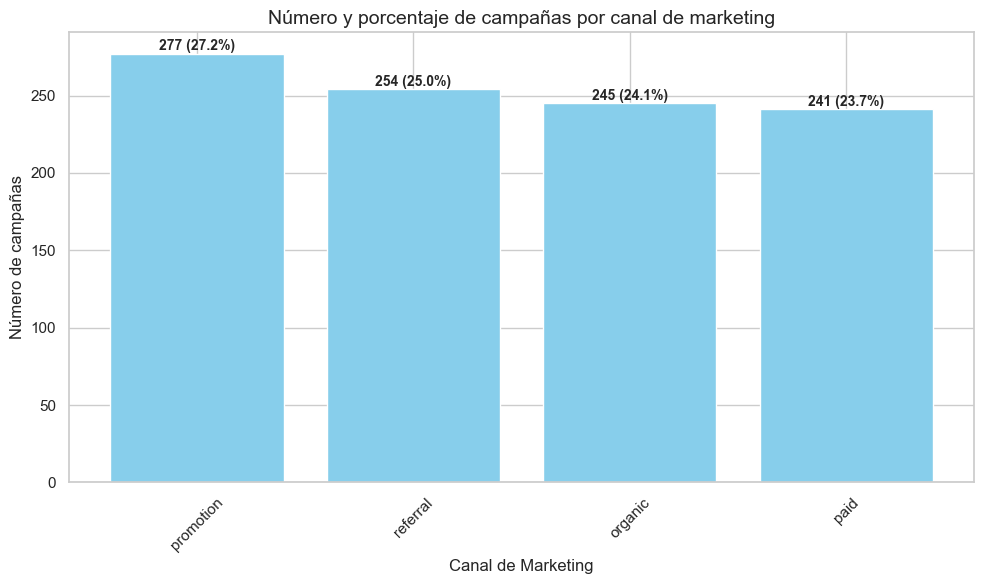

In [12]:

# Calcular cantidad y porcentaje
conteo = df['channel'].value_counts()
porcentaje = df['channel'].value_counts(normalize=True) * 100

# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(conteo.index, conteo.values, color='skyblue')

# Añadir etiquetas de número y porcentaje encima de cada barra
for i, bar in enumerate(bars):
    cantidad = conteo.values[i]
    pct = porcentaje.values[i]
    ax.text(bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 0.5,
            f'{cantidad} ({pct:.1f}%)',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# Estética del gráfico
ax.set_title('Número y porcentaje de campañas por canal de marketing', fontsize=14)
ax.set_xlabel('Canal de Marketing')
ax.set_ylabel('Número de campañas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


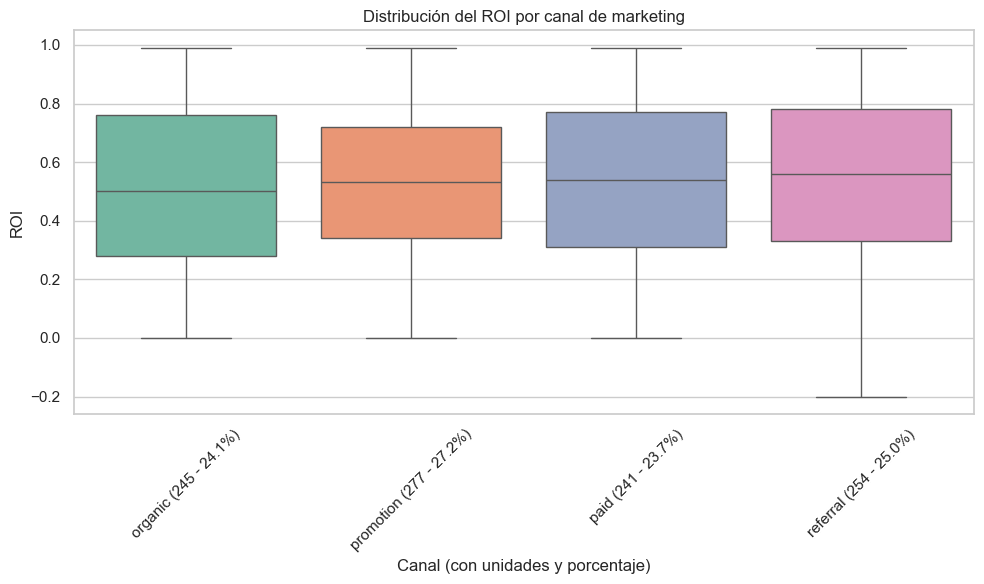

In [10]:
# Calcular unidades absolutas y porcentajes por canal
conteo = df['channel'].value_counts().reset_index()
conteo.columns = ['channel', 'count']
conteo['percentage'] = (conteo['count'] / conteo['count'].sum()) * 100

# Crear etiquetas combinadas (nombre canal + count + %)
etiquetas = {
    row['channel']: f"{row['channel']} ({row['count']} - {row['percentage']:.1f}%)"
    for _, row in conteo.iterrows()
}
df['channel_etiqueta'] = df['channel'].map(etiquetas)

# Gráfico de boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='channel_etiqueta', y='roi', palette='Set2')
plt.title("Distribución del ROI por canal de marketing")
plt.xlabel("Canal (con unidades y porcentaje)")
plt.ylabel("ROI")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### 📊 Conclusión Técnica
A partir del análisis de los gráficos, se observa que la diferencia en el retorno sobre la inversión (ROI) entre los distintos canales de marketing es relativamente moderada, con una variación máxima de aproximadamente 3,5 puntos porcentuales (o 36 unidades absolutas) entre el canal con mayor rendimiento y el de menor rendimiento.

El canal promotion presenta el mayor ROI con 277 unidades y representa el 27,2% del total, seguido de referral con 254 unidades (25%), organic con 245 unidades (24,1%) y paid con 241 unidades (23,7%).

Estos resultados sugieren que no existen diferencias sustanciales de rendimiento entre los canales de adquisición, independientemente de si requieren inversión directa (como paid y promotion) o no (organic y referral).

Este hallazgo invita a profundizar en el análisis del coste-beneficio de los canales de pago. En particular, podría ser útil evaluar si la reducción del gasto en canales pagos impacta negativamente en el ROI total o si el tráfico se redistribuye de manera natural hacia canales orgánicos o de referencia, manteniendo así la eficiencia de las campañas.

     channel target_audience  count  percentage
0    organic             B2B    128   12.586037
1    organic             B2C    117   11.504425
2       paid             B2B    118   11.602753
3       paid             B2C    123   12.094395
4  promotion             B2B    148   14.552606
5  promotion             B2C    128   12.586037
6  promotion    social media      1    0.098328
7   referral             B2B    128   12.586037
8   referral             B2C    126   12.389381


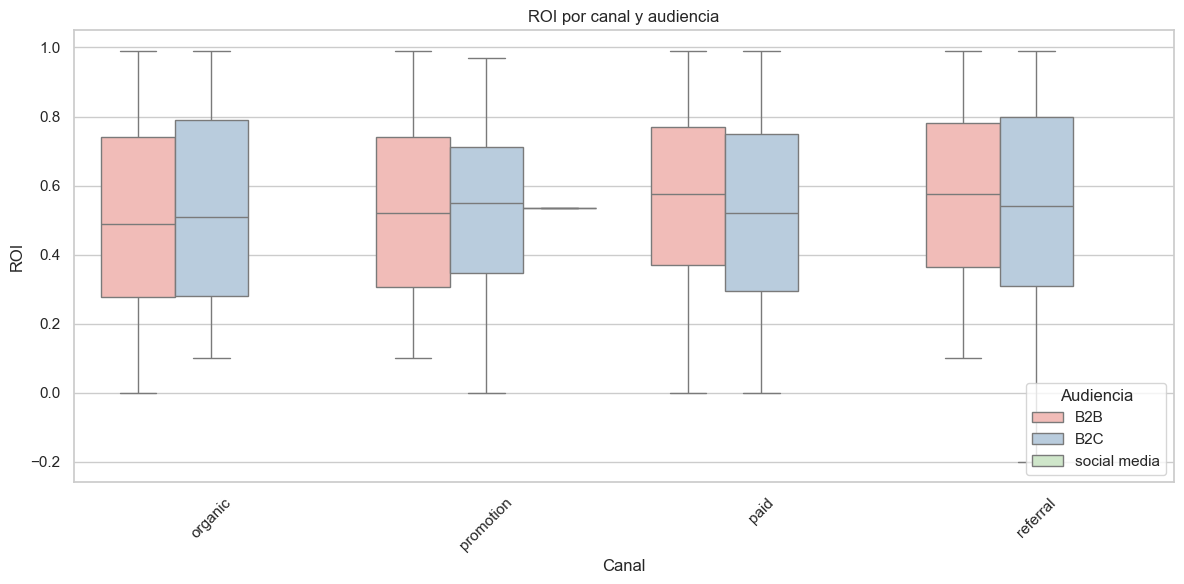

In [11]:
# Calcular número de ocurrencias por canal y audiencia
conteo = df.groupby(['channel', 'target_audience']).size().reset_index(name='count')
total = conteo['count'].sum()
conteo['percentage'] = (conteo['count'] / total) * 100

# Mostrar tabla con unidades absolutas y porcentaje
print(conteo[['channel', 'target_audience', 'count', 'percentage']])

# Crear el boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='channel', y='roi', hue='target_audience', palette='Pastel1')
plt.title("ROI por canal y audiencia")
plt.xlabel("Canal")
plt.ylabel("ROI")
plt.legend(title='Audiencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### 📊 Conclusión técnica:
El análisis de frecuencia por canal de marketing y audiencia revela que las campañas están relativamente bien distribuidas entre los distintos canales y públicos objetivos, con una ligera concentración en ciertos grupos. El canal promotion es el más utilizado, representando un 27,24% del total (14,55% en campañas B2B y 12,59% en B2C), con un caso aislado dirigido a social media. Le siguen referral (24,97%), organic (24,09%) y paid (23,70%), todos con una participación muy similar, lo que indica una estrategia de marketing multicanal relativamente equilibrada.

Desde el punto de vista de audiencia, tanto B2B como B2C están distribuidos de manera pareja dentro de cada canal, sin una predominancia clara de un tipo de audiencia sobre otro. Esto sugiere una orientación de marketing que busca atender a ambos segmentos de manera equitativa.

La escasa representación de campañas dirigidas a social media (0,1%) podría señalar una oportunidad no explotada o una limitación estratégica actual. Esta observación debería ser evaluada frente a los resultados de ROI por canal para identificar posibles oportunidades de optimización o expansión.

## ¿Qué tipo de campaña genera más ingresos en promedio y cuál tiene mejor conversión?

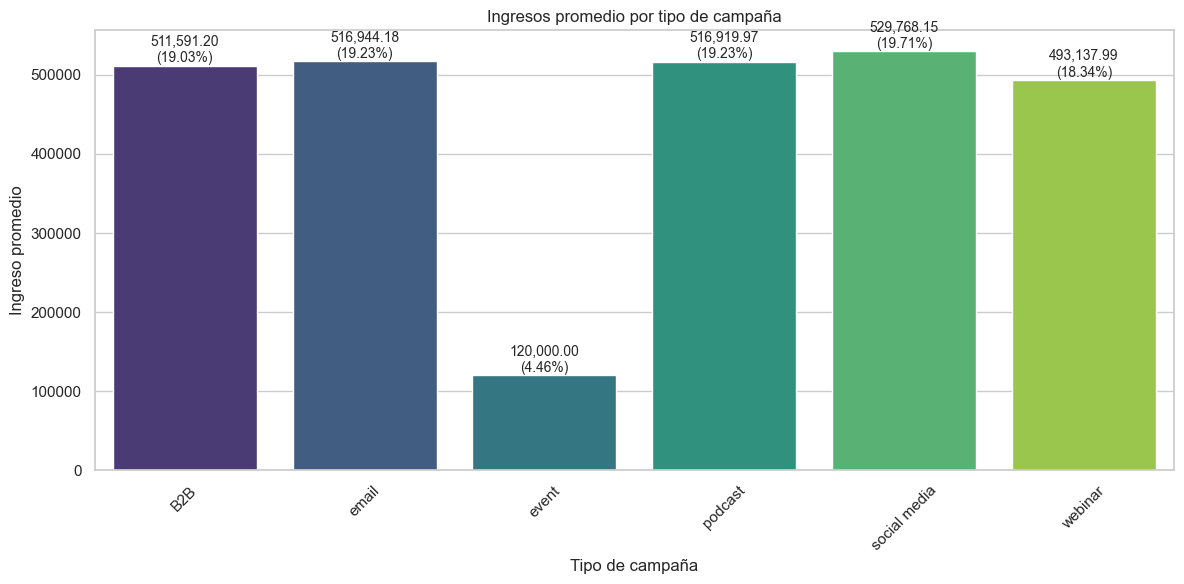

In [18]:
# Nos aseguramos de que las columnas relevantes son numéricas
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
df['conversion_rate'] = pd.to_numeric(df['conversion_rate'], errors='coerce')

# Paso 1: Ingresos promedio por tipo de campaña
ingresos_promedio = df.groupby('type')['revenue'].mean().reset_index()

# Paso 2: Tasa de conversión promedio por tipo de campaña
conversion_promedio = df.groupby('type')['conversion_rate'].mean().reset_index()

# Calcular el total de ingresos y la tasa de conversión para los porcentajes
total_ingresos = ingresos_promedio['revenue'].sum()
total_conversion_rate = conversion_promedio['conversion_rate'].sum()

# Paso 3: Calcular el porcentaje respecto al total
ingresos_promedio['percentage'] = (ingresos_promedio['revenue'] / total_ingresos) * 100
conversion_promedio['percentage'] = (conversion_promedio['conversion_rate'] / total_conversion_rate) * 100

# Gráfico 1: Ingresos promedio por tipo de campaña
plt.figure(figsize=(12, 6))
sns.barplot(data=ingresos_promedio, x='type', y='revenue', palette='viridis')
for i in range(len(ingresos_promedio)):
    plt.text(i, ingresos_promedio['revenue'][i] + 1000, 
             f'{ingresos_promedio["revenue"][i]:,.2f}\n({ingresos_promedio["percentage"][i]:.2f}%)',
             ha='center', va='bottom', fontsize=10)
plt.title("Ingresos promedio por tipo de campaña")
plt.xlabel("Tipo de campaña")
plt.ylabel("Ingreso promedio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Conclusión: Ingresos Promedio por Tipo de Campaña
Al analizar los ingresos promedio por tipo de campaña, se observa lo siguiente:

Email y Podcast son las campañas que generan la mayor parte de los ingresos, con un 19.23% de los ingresos totales cada una, alcanzando un promedio de 516,944.18 y 516,919.97 respectivamente. Esto indica que ambos tipos de campañas tienen un rendimiento financiero casi idéntico y son altamente efectivas en términos de ingresos.

Social Media se destaca también como una campaña exitosa, representando el 19.71% de los ingresos totales con un promedio de 529,768.15. Es ligeramente superior a las campañas de email y podcast, lo que sugiere que el canal de redes sociales tiene una eficiencia destacada en la generación de ingresos.

B2B, con un 19.03% de los ingresos totales y un promedio de 511,591.20, tiene un rendimiento relativamente similar al de las campañas anteriores, pero ligeramente inferior al de las campañas mencionadas.

Webinar, con un 18.34% de los ingresos totales y un promedio de 493,137.99, muestra un rendimiento competitivo, aunque con una ligera diferencia respecto a los tipos de campaña más efectivos.

Event, con el 4.46% de los ingresos totales y un promedio de 120,000.00, es el tipo de campaña que genera menos ingresos en comparación con los demás. Aunque puede ser útil para ciertos objetivos o segmentos específicos, no tiene el mismo impacto financiero que las otras campañas.

Resumen:
Los tipos de campaña más efectivos en términos de ingresos promedio son Social Media, Email, y Podcast, con una participación muy similar en los ingresos totales.

Event es la campaña que menos contribuye a los ingresos totales, con una diferencia considerable respecto a las demás campañas.

En general, las campañas digitales como Email, Social Media y Podcast tienen un rendimiento financiero superior en comparación con los eventos o webinars.

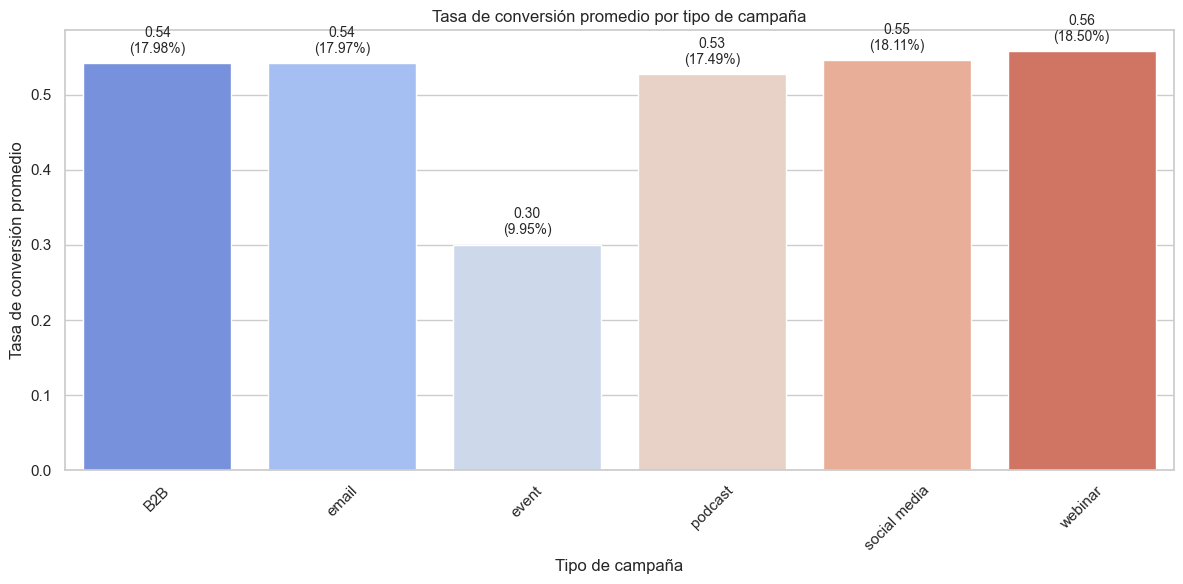

In [21]:
# Gráfico 2: Tasa de conversión promedio por tipo de campaña
plt.figure(figsize=(12, 6))
sns.barplot(data=conversion_promedio, x='type', y='conversion_rate', palette='coolwarm')
for i in range(len(conversion_promedio)):
    plt.text(i, conversion_promedio['conversion_rate'][i] + 0.01, 
             f'{conversion_promedio["conversion_rate"][i]:,.2f}\n({conversion_promedio["percentage"][i]:.2f}%)',
             ha='center', va='bottom', fontsize=10)
plt.title("Tasa de conversión promedio por tipo de campaña")
plt.xlabel("Tipo de campaña")
plt.ylabel("Tasa de conversión promedio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Conclusión: Tasa de Conversión Promedio por Tipo de Campaña
Al analizar la tasa de conversión promedio por tipo de campaña, se obtiene la siguiente información:

Webinar tiene la tasa de conversión más alta, con un 18.50% (0.56). Esto sugiere que, en promedio, las campañas de webinars están logrando una mayor efectividad en convertir a los usuarios en clientes o leads, lo que las hace altamente rentables en términos de conversión.

Social Media también muestra una tasa de conversión bastante alta, con un 18.11% (0.55), lo que indica que las campañas en redes sociales están generando resultados bastante efectivos, solo ligeramente inferiores a los webinars.

B2B, Email, y Podcast tienen tasas de conversión similares, con un 17.97% y 17.98% (0.54) en B2B y Email, y 17.49% (0.53) en Podcast. Aunque estas tasas son competitivas, están ligeramente por debajo de las obtenidas por Webinar y Social Media, pero aún siguen siendo efectivas.

Event tiene la tasa de conversión más baja, con un 9.95% (0.30), lo que sugiere que las campañas basadas en eventos, aunque puedan ser útiles para ciertos objetivos de marca, no son tan efectivas en términos de conversión en comparación con otras estrategias de marketing digital.

Resumen:
Webinar y Social Media son las campañas que tienen las mejores tasas de conversión, con Webinar liderando con un 18.50%.

Las campañas B2B, Email, y Podcast tienen tasas de conversión muy cercanas entre sí, con un rendimiento de 17.49% a 17.98%, lo que indica un nivel competitivo y efectivo en términos de conversión.

Event es el tipo de campaña con la tasa de conversión más baja (9.95%), lo que sugiere que los eventos, aunque pueden ser valiosos para el branding, no son tan efectivos en términos de generar conversiones en comparación con las estrategias de marketing digital.

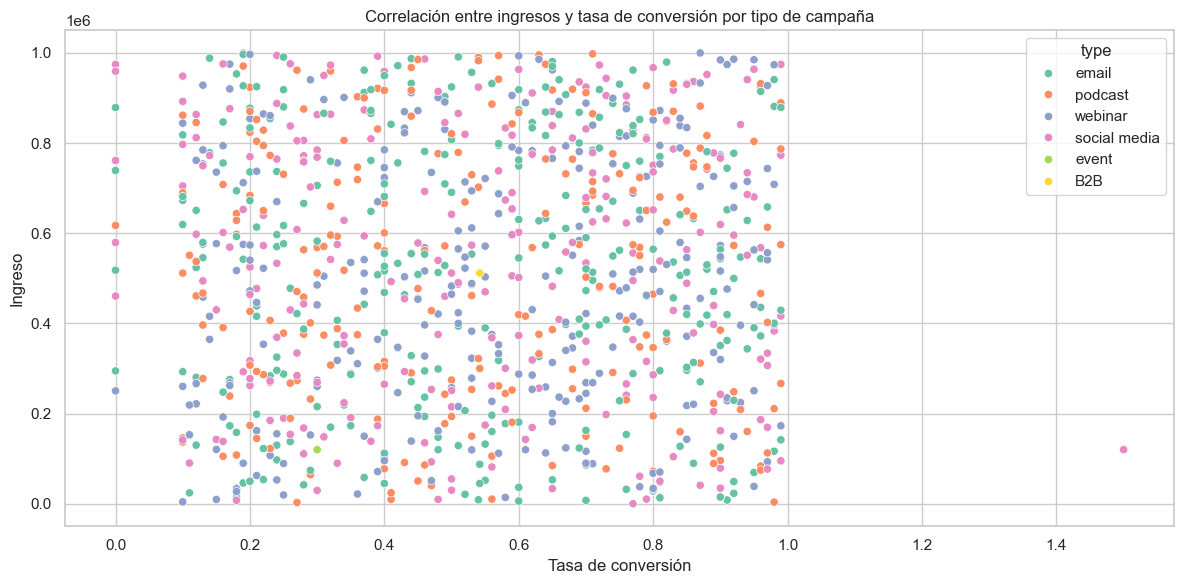

                 conversion_rate   revenue
conversion_rate         1.000000  0.004707
revenue                 0.004707  1.000000


In [23]:
# Gráfico 3: Diagrama de dispersión para correlación entre ingresos y tasa de conversión
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='conversion_rate', y='revenue', hue='type', palette='Set2')
plt.title("Correlación entre ingresos y tasa de conversión por tipo de campaña")
plt.xlabel("Tasa de conversión")
plt.ylabel("Ingreso")
plt.tight_layout()
plt.show()
correlation = df[['conversion_rate', 'revenue']].corr()
print(correlation)


 El coeficiente de correlación entre tasa de conversión (conversion_rate) y ingresos (revenue) es 0.004707, lo que indica una correlación extremadamente baja y casi nula entre estas dos variables. Este valor cercano a 0 sugiere que no hay una relación lineal significativa entre la tasa de conversión y los ingresos en el conjunto de datos.

Interpretación de la Correlación:
Correlación de 0.004707: Un valor tan bajo sugiere que, aunque los ingresos puedan variar entre las campañas, la tasa de conversión no tiene una relación directa con esos ingresos. Es posible que las campañas con una tasa de conversión alta no siempre estén generando más ingresos, o viceversa.

En este caso, se podría investigar otros factores que pueden estar influyendo en los ingresos, como el tipo de campaña, el presupuesto asignado, o incluso el canal de marketing.

Posibles Acciones:
Explorar otras métricas: Si la relación entre la tasa de conversión y los ingresos es débil, se puede explorar otras métricas que podrían tener una correlación más fuerte con los ingresos, como:

- Presupuesto: La cantidad de dinero invertido podría estar más fuertemente correlacionada con los ingresos.

- Tipo de campaña: Las campañas de ciertos tipos, como "paid", podrían tener una relación diferente con los ingresos.

- Revisar la segmentación: Se podría intentar segmentar aún más los datos según otros factores, como el canal de marketing o el target audience, para ver si hay alguna relación más fuerte en subgrupos específicos.

- Evaluación no lineal: A veces, una correlación baja en un análisis lineal no significa que no haya una relación. Puede ser útil investigar la relación de manera no lineal o con técnicas de modelado más avanzadas.

Conclusión:
La baja correlación entre tasa de conversión y ingresos implica que estos dos factores no están estrechamente relacionados en el conjunto de datos actual. A pesar de ello, podría ser útil explorar otras variables y técnicas para encontrar qué factores influyen más directamente en los ingresos de tus campañas.

channel
organic      0.064334
paid        -0.097465
promotion    0.054762
referral    -0.013334
dtype: float64


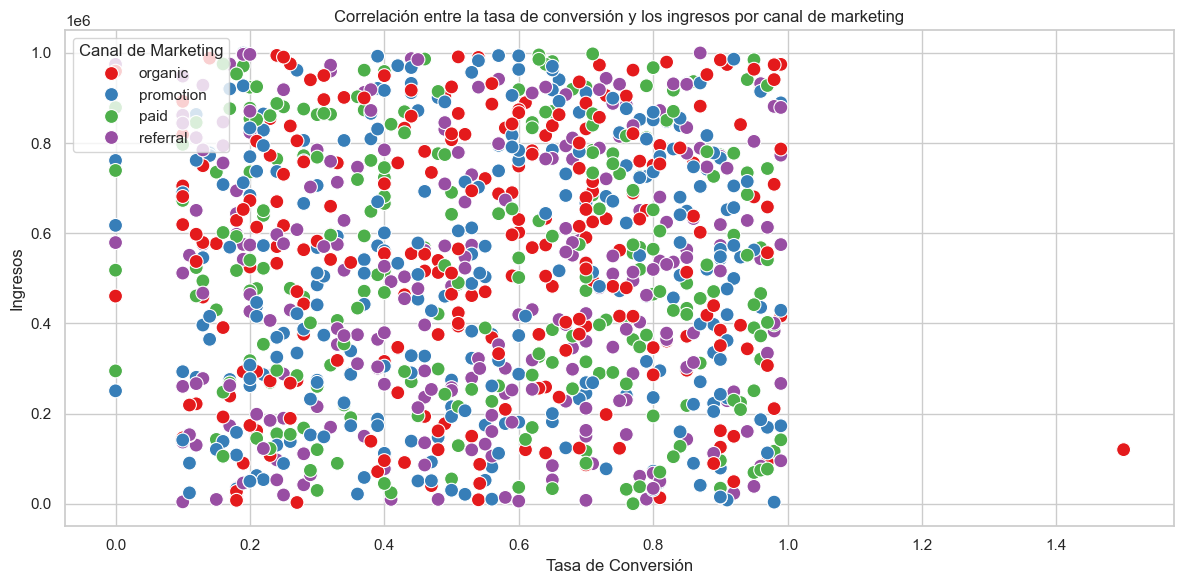

In [26]:
# Calcular la correlación entre 'conversion_rate' y 'revenue' por canal de marketing
canal_correlaciones = df.groupby('channel').apply(lambda x: x[['conversion_rate', 'revenue']].corr().iloc[0, 1])

# Mostrar resultados
print(canal_correlaciones)

# Graficar el diagrama de dispersión por canal de marketing
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='conversion_rate', y='revenue', hue='channel', palette='Set1', s=100)

# Mejorar la presentación del gráfico
plt.title('Correlación entre la tasa de conversión y los ingresos por canal de marketing')
plt.xlabel('Tasa de Conversión')
plt.ylabel('Ingresos')
plt.legend(title='Canal de Marketing', loc='upper left')
plt.tight_layout()

# Mostrar gráfico
plt.show()

#### Valores de Correlación por Canal de Marketing:

- Canal "organic": 0.0643

Correlación positiva muy débil, lo que sugiere que no hay una relación lineal fuerte entre la tasa de conversión y los ingresos en este canal.

A medida que aumenta la tasa de conversión, los ingresos tienden a aumentar ligeramente, pero la relación es prácticamente insignificante.

- Canal "paid": -0.0975

Correlación negativa muy débil. A medida que la tasa de conversión aumenta, los ingresos tienden a disminuir ligeramente en este canal, aunque esta relación es muy débil.

Puede ser que la conversión no esté directamente vinculada a mayores ingresos, o que otros factores, como el costo del canal, influyan más en los resultados.

- Canal "promotion": 0.0548

Correlación positiva muy débil. Similar a "organic", sugiere que existe una leve tendencia de que al aumentar la tasa de conversión, los ingresos también aumenten ligeramente, pero esta relación es mínima.

- Canal "referral": -0.0133

Correlación negativa extremadamente débil, cercana a cero. No hay una relación significativa entre la tasa de conversión y los ingresos en este canal. Es prácticamente irrelevante.

Resumen de la Interpretación:
Relación débil: En general, los valores de correlación son bajos en todos los canales, lo que indica que no hay una relación lineal fuerte entre la tasa de conversión y los ingresos dentro de cada canal de marketing.

Canales con correlación positiva débil: Los canales "organic" y "promotion" tienen una correlación positiva muy débil, lo que podría sugerir que un aumento en la tasa de conversión está ligeramente asociado con un aumento en los ingresos, pero la relación no es lo suficientemente fuerte como para considerarla significativa.

Canales con correlación negativa débil: En los canales "paid" y "referral", la correlación negativa indica que la tasa de conversión podría estar débilmente asociada con una disminución en los ingresos. Sin embargo, esta relación también es muy débil y no implica una tendencia clara.

Conclusión:
En general, no parece haber una relación fuerte entre la tasa de conversión y los ingresos, independientemente del canal de marketing utilizado. Es posible que otros factores, como el tipo de campaña, el presupuesto invertido, o la calidad de los clientes generados por cada canal, estén influyendo más en los ingresos que la tasa de conversión en sí misma.

Para una mayor comprensión, sería útil segmentar aún más los datos según otros factores, como el target audience o el tipo de campaña, o realizar análisis adicionales que consideren variables más complejas y su interacción.

target_audience
B2B             0.066140
B2C            -0.060364
social media         NaN
dtype: float64


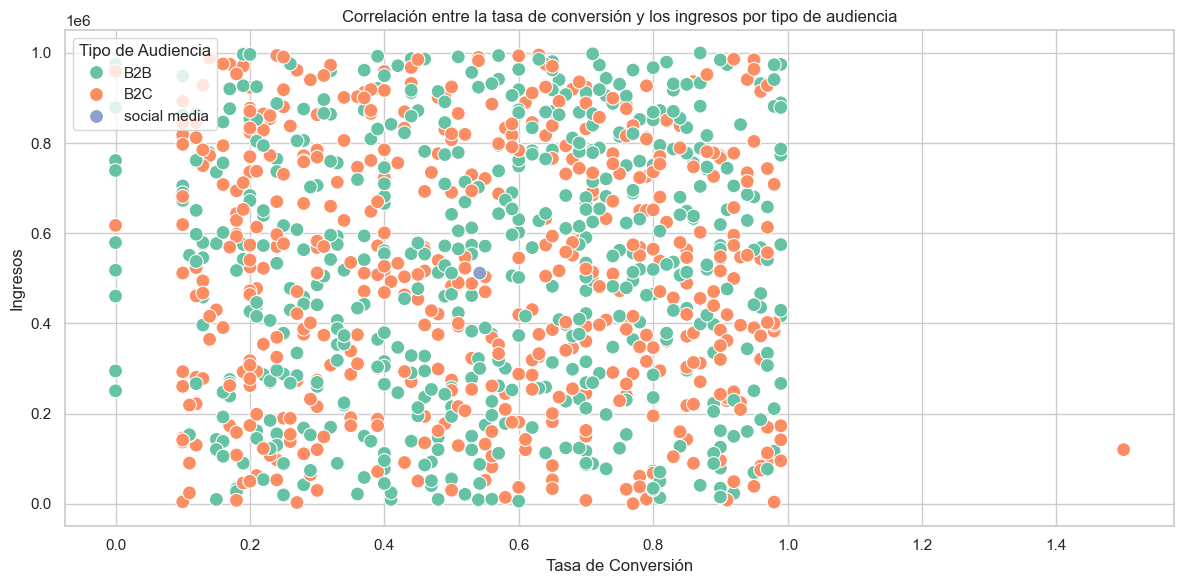

In [27]:
# Calcular la correlación entre 'conversion_rate' y 'revenue' por tipo de audiencia
audiencia_correlaciones = df.groupby('target_audience').apply(lambda x: x[['conversion_rate', 'revenue']].corr().iloc[0, 1])

# Mostrar resultados
print(audiencia_correlaciones)

# Graficar el diagrama de dispersión por tipo de audiencia
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='conversion_rate', y='revenue', hue='target_audience', palette='Set2', s=100)

# Mejorar la presentación del gráfico
plt.title('Correlación entre la tasa de conversión y los ingresos por tipo de audiencia')
plt.xlabel('Tasa de Conversión')
plt.ylabel('Ingresos')
plt.legend(title='Tipo de Audiencia', loc='upper left')
plt.tight_layout()

# Mostrar gráfico
plt.show()

#### Conclusión:
En el análisis de la correlación entre la tasa de conversión y los ingresos según el tipo de audiencia, se observan las siguientes conclusiones:

B2B (Business to Business):

La correlación es ligeramente positiva con un valor de 0.066140. Esto sugiere que, en términos generales, a medida que la tasa de conversión aumenta, los ingresos también tienden a aumentar, aunque la relación es muy débil. En otras palabras, los clientes B2B muestran una leve relación entre su conversión y el ingreso generado.

B2C (Business to Consumer):

La correlación es ligeramente negativa con un valor de -0.060364. Esto sugiere que en el caso de las campañas dirigidas al consumidor final, una mayor tasa de conversión podría no estar directamente relacionada con mayores ingresos. Es posible que otros factores, como el tipo de producto o el precio, influyan más en los ingresos en este segmento.

Social Media:

No se pudo calcular la correlación debido a la falta de datos, lo que sugiere que las campañas de social media podrían no estar suficientemente representadas en los datos o que no hay suficiente información para establecer una relación clara entre conversión e ingresos en este tipo de audiencia.

Implicaciones:
Las campañas B2B parecen tener una ligera relación entre la tasa de conversión y los ingresos, lo que indica que mejorar la conversión en este segmento podría tener un impacto positivo en los ingresos.

En el caso de las campañas B2C, aunque la conversión es importante, los ingresos no siempre siguen un patrón claro, lo que sugiere que otros factores (como el precio, la estacionalidad o el tipo de producto) podrían tener un mayor peso en la generación de ingresos.

Para las campañas de social media, se necesita más información o un análisis más profundo para comprender cómo la conversión influye en los ingresos en este canal.

En resumen, es recomendable segmentar más los datos y explorar otros factores que puedan estar influyendo en los ingresos, ya que la correlación entre la tasa de conversión y los ingresos no es lo suficientemente fuerte en todos los segmentos para concluir que una mayor conversión lleva necesariamente a mayores ingresos.